### Results and references 

https://arxiv.org/pdf/1807.07320.pdf SOTA in deep learning MA-CNN accuracy = 86.5%

https://arxiv.org/pdf/1310.1531.pdf SOTA in pre deeplearning era with feature eng, accuracy = 64.96%

first result with fastai resnet34 with allmost no tuning, accuracy = **76.4%**

and on resnet50 accuracy = **82.2%**

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
from fastai import *
from fastai.vision import *

### Constants, funcs and loads 

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [11]:
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [13]:
# this function is on fastai github, but maybe not in current versio (1.0.14)
def get_image_files_(c:PathOrStr, check_ext:bool=True, recurse=False)->FilePathList:
    "Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`."
    return [o for o in Path(c).glob('**/*' if recurse else '*')
            if not o.name.startswith('.') and not o.is_dir()
            and (not check_ext or (o.suffix in image_extensions))]

In [14]:
path = Path('/home/ubuntu/Data/birds/CUB_200_2011/')

In [15]:
path.ls()

['README',
 'bounding_boxes.txt',
 'images.txt',
 'classes.txt',
 'parts',
 'attributes',
 'train_test_split.txt',
 'image_class_labels.txt',
 'images']

In [16]:
path_img = path/'images'

In [17]:
fnames = get_image_files_(path_img, recurse=True)

In [19]:
fnames[:10], len(fnames)

([PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0058_16719.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0039_15235.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0080_16534.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0072_16697.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0060_15224.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0098_15226.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0102_16642.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0008_16416.jpg'),
  PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0081_15230.jpg'),
 

In [26]:
# check if all files ends with jpg
all(n.name.endswith('jpg') for n in fnames)

True

In [38]:
# fix pattern to work with new data
pat = r'/([^/]+)_\d+_\d+.jpg$'

##### Some sanity checks

In [34]:
exmpl.as_uri()

'file:///home/ubuntu/Data/birds/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0058_16719.jpg'

In [41]:
[re.findall(pat, exmpl.as_uri()) for exmpl in fnames[10000:10010]]

[['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink'],
 ['Bobolink']]

### Creating dataset

In [42]:
data = ImageDataBunch.from_name_re(path=path_img, fnames=fnames, 
                                   pat=pat, valid_pct=0.2, ds_tfms=get_transforms(), 
                                   size=224, bs=bs)

In [50]:
data.normalize(imagenet_stats)

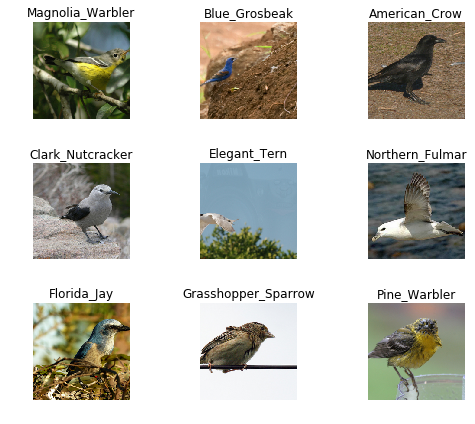

In [52]:
data.show_batch(rows=3, figsize=(7,6))

In [53]:
print(data.classes)

['Painted_Bunting', 'Pigeon_Guillemot', 'Yellow_Billed_Cuckoo', 'Western_Meadowlark', 'Cape_May_Warbler', 'Prothonotary_Warbler', 'Hooded_Warbler', 'Marsh_Wren', 'Green_Violetear', 'House_Sparrow', 'Least_Auklet', 'Magnolia_Warbler', 'Swainson_Warbler', 'Blue_Winged_Warbler', 'Vermilion_Flycatcher', 'Bohemian_Waxwing', 'Boat_Tailed_Grackle', 'Red_Cockaded_Woodpecker', 'Pomarine_Jaeger', 'Northern_Fulmar', 'Orchard_Oriole', 'Ivory_Gull', 'Le_Conte_Sparrow', 'Black_Throated_Blue_Warbler', 'Canada_Warbler', 'Lazuli_Bunting', 'Wilson_Warbler', 'Field_Sparrow', 'Cerulean_Warbler', 'Frigatebird', 'Red_Legged_Kittiwake', 'Ring_Billed_Gull', 'Black_Capped_Vireo', 'Eastern_Towhee', 'Scarlet_Tanager', 'Savannah_Sparrow', 'Western_Wood_Pewee', 'Mourning_Warbler', 'Horned_Lark', 'Rock_Wren', 'Bank_Swallow', 'Green_Jay', 'Glaucous_Winged_Gull', 'Least_Tern', 'Golden_Winged_Warbler', 'Black_And_White_Warbler', 'Rusty_Blackbird', 'Blue_Jay', 'Downy_Woodpecker', 'Indigo_Bunting', 'Heermann_Gull', 'Cla

In [54]:
len(data.classes), data.c

(200, 200)

###  Training

In [57]:
doc(metrics.accuracy)

In [61]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [62]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


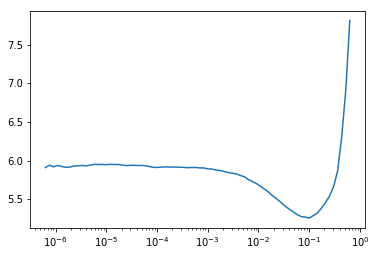

In [63]:
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(4, 0.01)

Total time: 05:56
epoch  train_loss  valid_loss  error_rate
1      2.754029    2.111438    0.544639    (01:28)
2      2.135739    1.524960    0.423751    (01:29)
3      1.460552    1.018724    0.295600    (01:29)
4      1.038780    0.892765    0.254165    (01:28)



In [65]:
learn.path

PosixPath('/home/ubuntu/Data/birds/CUB_200_2011/images')

In [66]:
learn.model_dir

'models'

In [67]:
learn.save('stage-1')

### Interpriting results 

In [68]:
interp = ClassificationInterpretation.from_learner(learn)

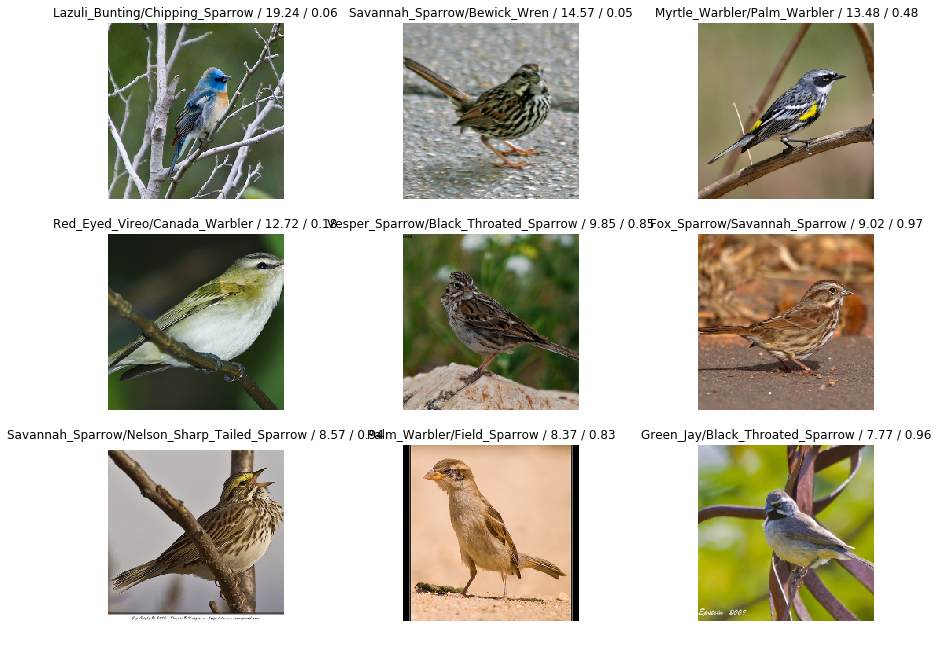

In [69]:
interp.plot_top_losses(9, figsize=(15,11))

In [71]:
doc(interp.plot_top_losses)

In [72]:
interp.most_confused(min_val=2)

[('Loggerhead_Shrike', 'Great_Grey_Shrike', 8),
 ('Louisiana_Waterthrush', 'Northern_Waterthrush', 5),
 ('Olive_Sided_Flycatcher', 'Western_Wood_Pewee', 5),
 ('Yellow_Throated_Vireo', 'Pine_Warbler', 5),
 ('Elegant_Tern', 'Caspian_Tern', 5),
 ('Artic_Tern', 'Common_Tern', 4),
 ('Fish_Crow', 'Common_Raven', 4),
 ('Nighthawk', 'Whip_Poor_Will', 4),
 ('Western_Gull', 'California_Gull', 4),
 ('Black_Billed_Cuckoo', 'Yellow_Billed_Cuckoo', 4),
 ('Yellow_Bellied_Flycatcher', 'Acadian_Flycatcher', 4),
 ('House_Sparrow', 'Tree_Sparrow', 3),
 ('Rusty_Blackbird', 'Brewer_Blackbird', 3),
 ('American_Crow', 'Fish_Crow', 3),
 ('American_Crow', 'Common_Raven', 3),
 ('Chuck_Will_Widow', 'Whip_Poor_Will', 3),
 ('California_Gull', 'Western_Gull', 3),
 ('Herring_Gull', 'Glaucous_Winged_Gull', 3),
 ('Fish_Crow', 'Groove_Billed_Ani', 3),
 ('Cliff_Swallow', 'Barn_Swallow', 3),
 ('Bewick_Wren', 'Rock_Wren', 3),
 ('Eared_Grebe', 'Pied_Billed_Grebe', 3),
 ('Brandt_Cormorant', 'Pelagic_Cormorant', 3),
 ('Summe

### Unfreezing, fine-tuning, and learning rates

In [73]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


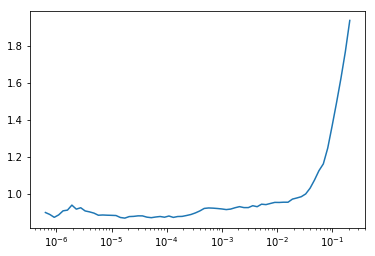

In [74]:
learn.recorder.plot()

In [75]:
learn.unfreeze()

In [76]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

Total time: 03:33
epoch  train_loss  valid_loss  error_rate
1      0.897602    0.882197    0.253738    (01:47)
2      0.896023    0.877982    0.253738    (01:46)



In [77]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

Total time: 01:46
epoch  train_loss  valid_loss  error_rate
1      0.872473    0.871027    0.245622    (01:46)



### Training: resnet50

In [78]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs//2)
data.normalize(imagenet_stats)

In [79]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


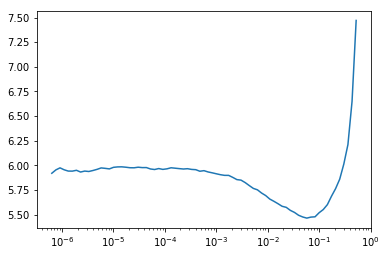

In [81]:
learn.lr_find()
learn.recorder.plot()

In [82]:
doc(learn.fit_one_cycle)

In [85]:
learn.fit_one_cycle(4, max_lr=slice(1e-3))

Total time: 21:36
epoch  train_loss  valid_loss  error_rate
1      3.418628    2.422839    0.523868    (05:41)
2      1.683359    1.167371    0.299588    (05:18)
3      1.056351    0.887418    0.232099    (05:18)
4      0.845278    0.848132    0.222634    (05:18)



In [86]:
learn.save('stage-1-50')

In [87]:
learn.fit_one_cycle(2, max_lr=slice(1e-3))

Total time: 10:35
epoch  train_loss  valid_loss  error_rate
1      0.969177    0.839146    0.222634    (05:17)
2      0.684676    0.749677    0.206584    (05:17)



In [88]:
learn.save('stage-1-50')

In [89]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


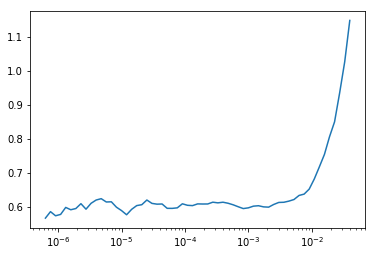

In [90]:
learn.recorder.plot()

In [91]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 14:08
epoch  train_loss  valid_loss  error_rate
1      0.618024    0.712266    0.196296    (07:08)
2      0.562773    0.691271    0.187243    (06:59)



#### Second try

In [97]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [98]:
learn.fit_one_cycle(6, max_lr=slice(1e-2))

Total time: 31:52
epoch  train_loss  valid_loss  error_rate
1      2.055114    1.546446    0.427140    (05:18)
2      1.988044    1.377531    0.377453    (05:18)
3      1.523182    1.082837    0.305219    (05:18)
4      1.014461    0.824153    0.229645    (05:18)
5      0.715516    0.676034    0.187891    (05:18)
6      0.556746    0.644870    0.174113    (05:18)



In [99]:
learn.save('stage-1-50-v1')

In [100]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 14:05
epoch  train_loss  valid_loss  error_rate
1      0.491724    0.621317    0.167850    (07:05)
2      0.438311    0.619500    0.167432    (07:00)



In [101]:
interp = ClassificationInterpretation.from_learner(learn)

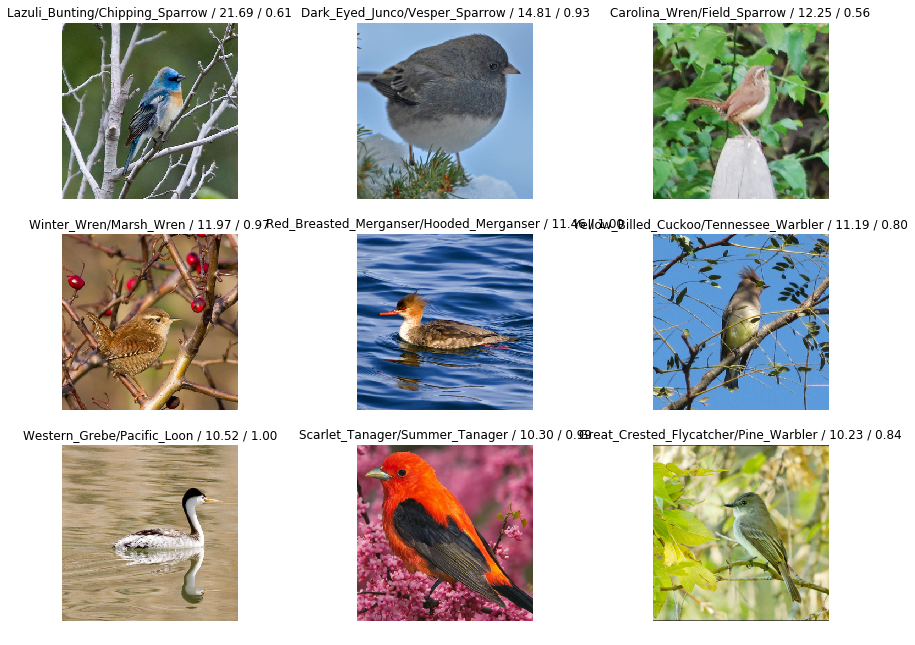

In [102]:
interp.plot_top_losses(9, figsize=(15,11))

In [103]:
interp.most_confused(min_val=2)

[('Common_Raven', 'American_Crow', 6),
 ('Long_Tailed_Jaeger', 'Pomarine_Jaeger', 5),
 ('Barn_Swallow', 'Cliff_Swallow', 4),
 ('Loggerhead_Shrike', 'Great_Grey_Shrike', 4),
 ('Brandt_Cormorant', 'Pelagic_Cormorant', 4),
 ('Least_Flycatcher', 'Acadian_Flycatcher', 4),
 ('Rusty_Blackbird', 'Brewer_Blackbird', 3),
 ('Artic_Tern', 'Common_Tern', 3),
 ('Great_Grey_Shrike', 'Loggerhead_Shrike', 3),
 ('Herring_Gull', 'Ring_Billed_Gull', 3),
 ('Warbling_Vireo', 'Philadelphia_Vireo', 3),
 ('Olive_Sided_Flycatcher', 'Western_Wood_Pewee', 3),
 ('Olive_Sided_Flycatcher', 'Sayornis', 3),
 ('Acadian_Flycatcher', 'Least_Flycatcher', 3),
 ('Caspian_Tern', 'Elegant_Tern', 3),
 ('Black_Footed_Albatross', 'Sooty_Albatross', 3),
 ('Eared_Grebe', 'Horned_Grebe', 3),
 ('American_Pipit', 'Sage_Thrasher', 3),
 ('Shiny_Cowbird', 'American_Crow', 3),
 ('Song_Sparrow', 'Lincoln_Sparrow', 3),
 ('Elegant_Tern', 'Caspian_Tern', 3)]